In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_excel('PRICE INDEX.xlsx').set_index('Date')

In [11]:
col_2000_2005 = df['2000':'2004'][df.columns[0]]

/home/hossein4527/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


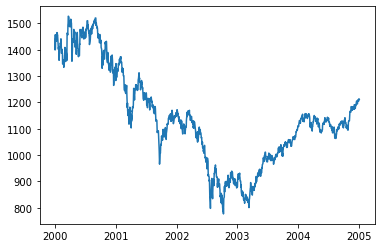

In [12]:
plt.plot(col_2000_2005)

In [16]:
np.std(col_2000_2005.values)

182.84589140040586

In [23]:
std_risk = []
stds = []
tau = 10
leng = int(len(col_2000_2005)/tau)
days = int(len(col_2000_2005)/2)
for i in range(2,days):
    std_risk.append([])
    for j in range(int(len(col_2000_2005)/i)):
        std_risk[-1].append(np.std(col_2000_2005.values[j*i:(j+1)*i]))
    stds.append(np.mean(std_risk[-1]))    

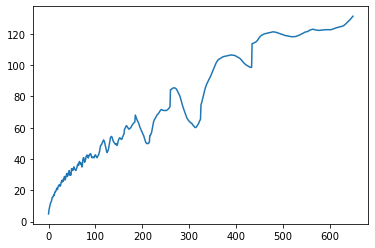

In [24]:
plt.plot(stds)

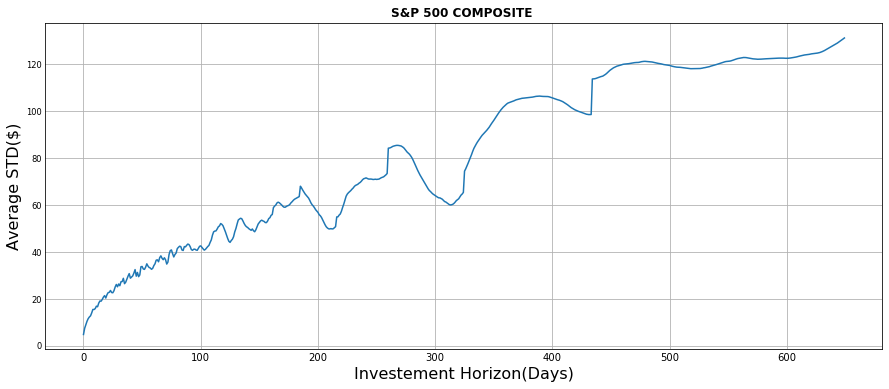

In [32]:
fig , ax = plt.subplots(figsize=(15,6))
ax.tick_params('x', length=0, labelsize="medium", which='major')
ax.tick_params('y', length=0, labelsize="small", which='major')

ax.set_title(df.columns[0].replace('- PRICE INDEX',''), weight="semibold")
ax.set_xlabel('Investement Horizon(Days)', fontsize=16)
ax.set_ylabel('Average STD($)', fontsize=16)
ax.plot(stds)
ax.grid(True)
plt.savefig('fig5_2.png', dpi=600)